In [ ]:
pip install wordcloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


count    13316.000000
mean        72.782667
std         21.642896
min         16.000000
25%         59.000000
50%         73.000000
75%         86.000000
max        202.000000
Name: Length, dtype: float64


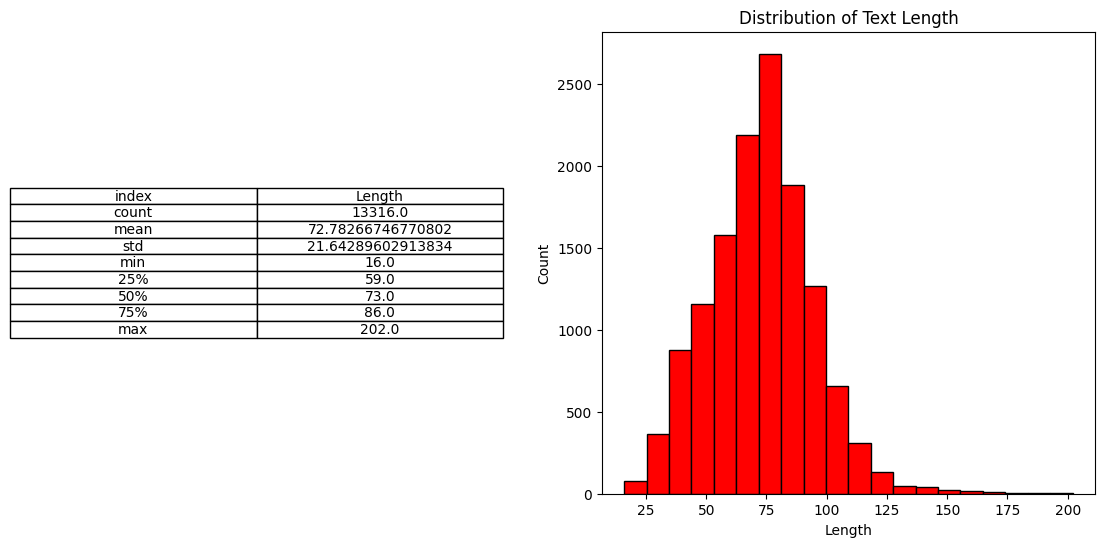

<ipython-input-4-d35597e1b51a>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  present_sentences['Length'] = present_sentences['Sentence'].apply(len)
<ipython-input-4-d35597e1b51a>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_sentences['Length'] = past_sentences['Sentence'].apply(len)
<ipython-input-4-d35597e1b51a>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Present Sentences Summary Statistics
count    4621.000000
mean       82.367453
std        17.321246
min        19.000000
25%        71.000000
50%        82.000000
75%        92.000000
max       196.000000
Name: Length, dtype: float64

Past Sentences Summary Statistics
count    3851.000000
mean       59.120488
std        14.622755
min        25.000000
25%        49.000000
50%        60.000000
75%        69.000000
max       108.000000
Name: Length, dtype: float64

Future Sentences Summary Statistics
count    4844.000000
mean       74.500619
std        24.343424
min        16.000000
25%        60.000000
50%        76.000000
75%        89.000000
max       202.000000
Name: Length, dtype: float64


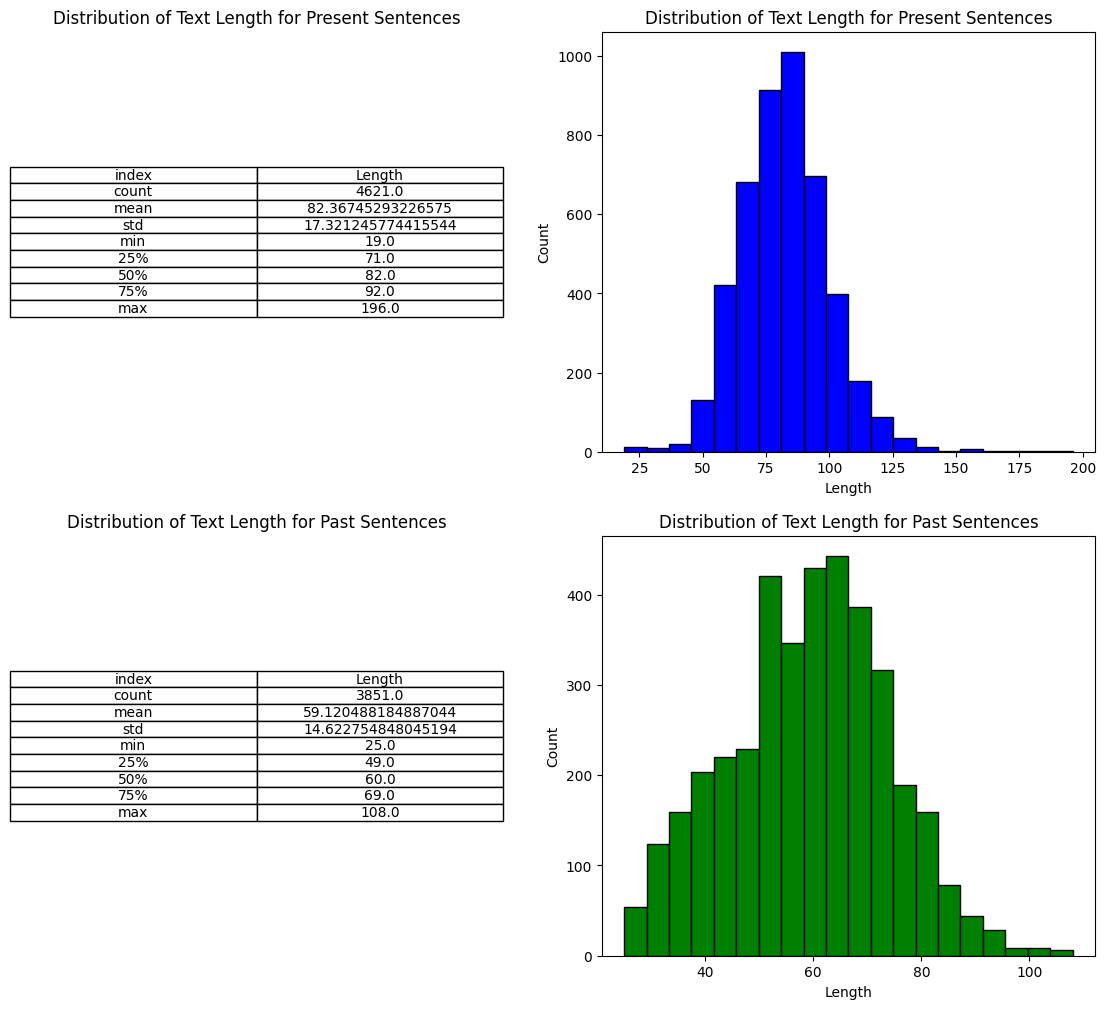

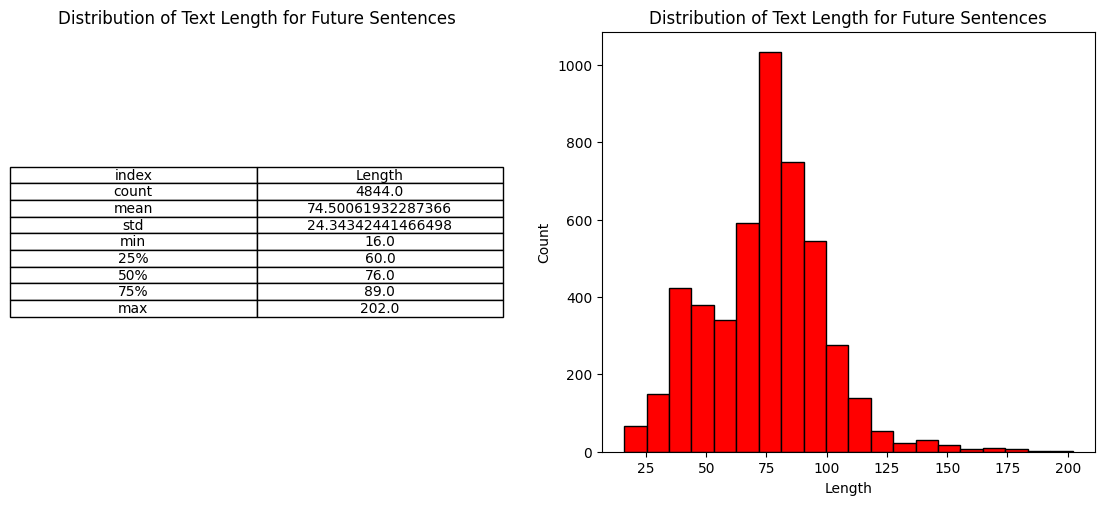


Most Frequent Words in Present Sentences:
the: 2761
of: 1569
in: 1467
have: 1458
and: 1318
to: 1262
for: 1128
are: 908
been: 901
a: 741
on: 470
with: 441
has: 358
their: 308
is: 271
women: 223
development: 183
security: 173
learning: 166
virtual: 158
exploring: 153
many: 149
participating: 144
like: 140
scientists: 136
into: 136
facebook: 135
sustainable: 135
as: 134
its: 134

Most Frequent Words in Past Sentences:
the: 3283
a: 2176
and: 1108
they: 908
to: 876
had: 807
he: 776
she: 755
in: 732
of: 587
for: 439
on: 429
with: 412
we: 380
was: 335
at: 302
before: 301
attended: 232
her: 226
his: 218
their: 210
were: 193
been: 174
it: 153
from: 147
completed: 140
by: 132
project: 124
pyramids: 123
car: 116

Most Frequent Words in Future Sentences:
will: 4391
have: 2023
the: 1471
by: 1355
been: 1181
for: 1134
in: 1073
be: 977
to: 842
of: 672
and: 627
a: 560
with: 405
next: 397
bangladeshi: 307
years: 278
future: 260
they: 238
on: 227
pollution: 215
i: 209
virtual: 206
systems: 203
technolog

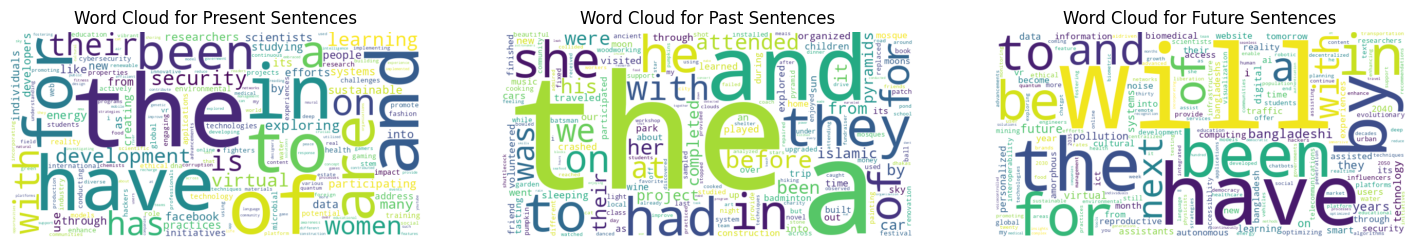

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
from wordcloud import WordCloud

# Load your dataset
df = pd.read_excel('/content/drive/MyDrive/A Machine Learning Based Approach to Classify Tense from English Text/Dataset/TenseUniqueDataset.xlsx')

# Rename columns for ease of use
df.rename(columns={'Sentence1': 'Sentence', 'Labels': 'Label'}, inplace=True)

# Compute the length of each sentence
df['Length'] = df['Sentence'].apply(len)

# Summary statistics
summary_stats = df['Length'].describe()

# Print summary statistics
print(summary_stats)

# Plotting the distribution
plt.figure(figsize=(14, 6))

# Create summary table
ax0 = plt.subplot(121)
ax0.axis('off')
table1_data = summary_stats.reset_index()
ax0.table(cellText=table1_data.values, colLabels=table1_data.columns, cellLoc='center', loc='center')

# Create histogram
ax2 = plt.subplot(122)
ax2.hist(df['Length'], bins=20, color='red', edgecolor='black')
ax2.set_title('Distribution of Text Length')
ax2.set_xlabel('Length')
ax2.set_ylabel('Count')

plt.show()

# Filter sentences by tense
present_sentences = df[df['Label'] == 1]
past_sentences = df[df['Label'] == 2]
future_sentences = df[df['Label'] == 3]

# Compute the length of each sentence for each class
present_sentences['Length'] = present_sentences['Sentence'].apply(len)
past_sentences['Length'] = past_sentences['Sentence'].apply(len)
future_sentences['Length'] = future_sentences['Sentence'].apply(len)

# Summary statistics for each class
present_summary_stats = present_sentences['Length'].describe()
past_summary_stats = past_sentences['Length'].describe()
future_summary_stats = future_sentences['Length'].describe()

# Print summary statistics
print("Present Sentences Summary Statistics")
print(present_summary_stats)
print("\nPast Sentences Summary Statistics")
print(past_summary_stats)
print("\nFuture Sentences Summary Statistics")
print(future_summary_stats)

# Plotting the distribution
plt.figure(figsize=(14, 12))

# Create summary table for present sentences
ax1 = plt.subplot(221)
ax1.axis('off')
present_table_data = present_summary_stats.reset_index()
ax1.table(cellText=present_table_data.values, colLabels=present_table_data.columns, cellLoc='center', loc='center')
ax1.set_title('Distribution of Text Length for Present Sentences')

# Create histogram for present sentences
ax2 = plt.subplot(222)
ax2.hist(present_sentences['Length'], bins=20, color='blue', edgecolor='black')
ax2.set_title('Distribution of Text Length for Present Sentences')
ax2.set_xlabel('Length')
ax2.set_ylabel('Count')

# Create summary table for past sentences
ax3 = plt.subplot(223)
ax3.axis('off')
past_table_data = past_summary_stats.reset_index()
ax3.table(cellText=past_table_data.values, colLabels=past_table_data.columns, cellLoc='center', loc='center')
ax3.set_title('Distribution of Text Length for Past Sentences')

# Create histogram for past sentences
ax4 = plt.subplot(224)
ax4.hist(past_sentences['Length'], bins=20, color='green', edgecolor='black')
ax4.set_title('Distribution of Text Length for Past Sentences')
ax4.set_xlabel('Length')
ax4.set_ylabel('Count')

plt.show()

# Plotting the distribution for future sentences
plt.figure(figsize=(14, 12))

# Create summary table for future sentences
ax5 = plt.subplot(221)
ax5.axis('off')
future_table_data = future_summary_stats.reset_index()
ax5.table(cellText=future_table_data.values, colLabels=future_table_data.columns, cellLoc='center', loc='center')
ax5.set_title('Distribution of Text Length for Future Sentences')

# Create histogram for future sentences
ax6 = plt.subplot(222)
ax6.hist(future_sentences['Length'], bins=20, color='red', edgecolor='black')
ax6.set_title('Distribution of Text Length for Future Sentences')
ax6.set_xlabel('Length')
ax6.set_ylabel('Count')

plt.show()

# Function to tokenize sentences
def tokenize(sentence):
    return re.split(r'\s|,|;', sentence)

# Tokenize and count the frequency of words for present sentences
present_words = present_sentences['Sentence'].apply(tokenize).sum()
present_word_counts = Counter(present_words)

# Tokenize and count the frequency of words for past sentences
past_words = past_sentences['Sentence'].apply(tokenize).sum()
past_word_counts = Counter(past_words)

# Tokenize and count the frequency of words for future sentences
future_words = future_sentences['Sentence'].apply(tokenize).sum()
future_word_counts = Counter(future_words)

# Get the most common words
most_common_present = present_word_counts.most_common(30)
most_common_past = past_word_counts.most_common(30)
most_common_future = future_word_counts.most_common(30)

# Display the most frequent words
print("\nMost Frequent Words in Present Sentences:")
for word, freq in most_common_present:
    print(f"{word}: {freq}")

print("\nMost Frequent Words in Past Sentences:")
for word, freq in most_common_past:
    print(f"{word}: {freq}")

print("\nMost Frequent Words in Future Sentences:")
for word, freq in most_common_future:
    print(f"{word}: {freq}")

# Generate word clouds
plt.figure(figsize=(18, 6))

# Word cloud for present sentences
present_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(present_word_counts)
ax7 = plt.subplot(131)
ax7.imshow(present_wordcloud, interpolation='bilinear')
ax7.axis('off')
ax7.set_title('Word Cloud for Present Sentences')

# Word cloud for past sentences
past_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(past_word_counts)
ax8 = plt.subplot(132)
ax8.imshow(past_wordcloud, interpolation='bilinear')
ax8.axis('off')
ax8.set_title('Word Cloud for Past Sentences')

# Word cloud for future sentences
future_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(future_word_counts)
ax9 = plt.subplot(133)
ax9.imshow(future_wordcloud, interpolation='bilinear')
ax9.axis('off')
ax9.set_title('Word Cloud for Future Sentences')

plt.show()
